# Python ile Veri Bilimine Giriş - Final Projesi
## Anime Veriseti
Bu projede "MyAnimeList Datasets - 2023" isimli veriseti ele alınmıştır. Anime evreninin IMDB'si olarak kabul edilen MyAnimeList sitesinden alınan verileri içerir. Bu çalışmada bir animenin özelliklerinin; animenin aldığı puan, sıralamadaki yeri, favoriye eklenme sayısı gibi sonuçlarda nasıl bir etkiye sahip olduğu makine öğrenmesi yöntemleriyle açıklanmaya çalışılacaktır. Orijinal web sitesinin url'i: https://myanimelist.net

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Verisetine İlk Bakış
Verisetini incelediğimizde göze çarpan bazı detaylar mevcut. Animelerin isimleri, kapak fotoğraf url'leri, İngilizce isimleri gibi işimize yaramayacak veriler mevcut. Bu gereksiz sütunların verisetinden çıkarılması gerekmektedir.

In [2]:
df = pd.read_csv('anime-dataset-2023.csv')
df.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


## Boyut Bilgisi
Burada veri setinin boyut bilgisi verilmiştir.

In [3]:
df.shape

(24905, 24)

## Veriseti Hakkında Bilgi
Veriseti hakkında genel bilgiler aşağıda verilmiştir.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

## Veri Görselleştirme
Bir sütundaki verilerin dağılımını gözlemlemek için grafikler kullanarak fikir sahibi olunabilir. Burada "Genres" sütununun değerlerine bir genel bakış yapılmıştır. En çok gözlenen türün komedi, en az gözlenen türün sports olduğu gözleniyor. Ayrıca oldukça fazla sayıda unknown veri olduğu göze çarpıyor. İlerleyen satırlarda bu konuda çözümler geliştirilecektir. 

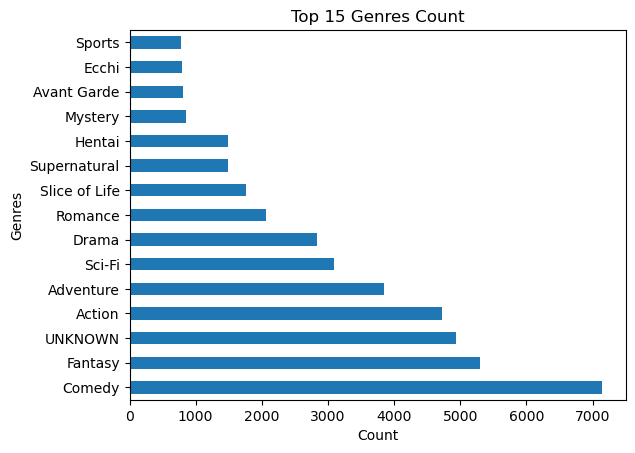

In [5]:
genre_counts = df['Genres'].str.split(', ').explode().value_counts()
top_genres = genre_counts.head(15)
ax = top_genres.plot.barh()
ax.set_xlabel('Count')
ax.set_ylabel('Genres')
ax.set_title('Top 15 Genres Count')
plt.show()

## Veri Görselleştirme - 2
Burada animelerin sahip olduğu önerilen izleyici kitlelerini içeren sütun ele alınmıştır.

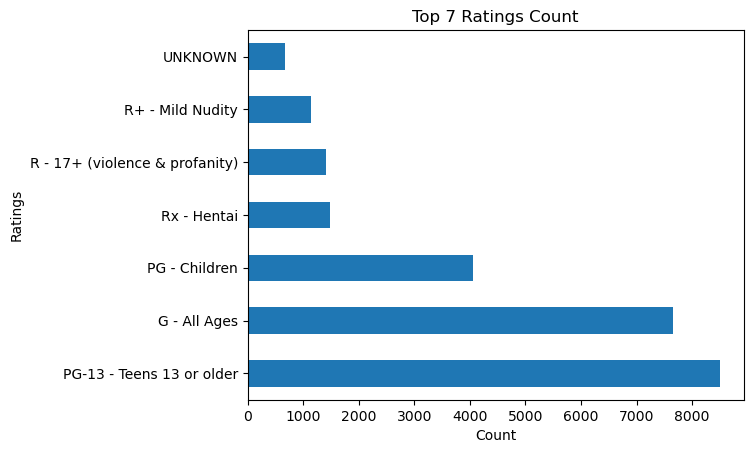

In [6]:
genre_counts = df['Rating'].str.split(', ').explode().value_counts()
top_genres = genre_counts.head(7)
ax = top_genres.plot.barh()
ax.set_xlabel('Count')
ax.set_ylabel('Ratings')
ax.set_title('Top 7 Ratings Count')
plt.show()

## Sütun Silme
Burada işimize yaramayacak ve geçersiz olan sütunları siliyoruz.

In [7]:
df.drop(columns=['anime_id', 'Name', 'English name', 'Other name', 'Synopsis', 'Aired', 'Premiered', 'Producers', 'Licensors', 'Studios', 'Duration', 'Image URL'], inplace=True)

## Aykırı Değerlerleri Temizlemek
Burada "Status" sütunu "Finished Airing" olmayan satırları çıkarıyoruz. Çünkü henüz tamamlanmamış ve çıkmamış animelerin verileri stabil değildir.

In [8]:
def filter_func(x):
    return x['Status'] == 'Finished Airing'
df = df[df.apply(filter_func, axis=1)]
df.shape

(24070, 12)

## Gereksiz Sütunları Kaldırmak
"Status" değeri "Not yet aired" ve "Currently Airing" olan değerleri çıkardığımızdan dolayı şu an Status sütunundaki tüm değerler "Finished Airing" durumundadır. Bu da bizim için ayırt edici olmadığı için bu sütunu artık kaldırabiliriz.

In [9]:
df.drop(columns=['Status'], inplace=True)

## Eksik Verilerden Kurtulmak
Bu verisetinde bazı animeler hakkında birçok bilgiye erişilemiyor. Bahsedilen animelerin birçok sütunu 'UNKNOWN' değerlerine sahip. Bu yüzden 'UNKNOWN' değere sahip olan verileri verisetinden çıkarıyoruz ve daha kararlı bir veriseti elde etmiş oluyoruz.

In [10]:
mask = df.applymap(lambda x: x == 'UNKNOWN').any(axis=1)
df = df[~mask]
df.shape

(11840, 11)

## Kategorizasyon
Burada "Genres" ismindeki sütun bir animenin ait olduğu tür etiketlerini barındırmaktadır. Bir anime birden çok türle temsil edilebileceği için dummy yöntemiyle her bir türü bir sütun haline getiriyoruz. Bu sayede tür sutunları içerisinde bir animenin ait olduğu türler 1, ait olmadığı türler 0 ile temsil edilecek.

In [11]:
genres_dummies = df['Genres'].str.get_dummies(', ')
df = pd.concat([df, genres_dummies], axis=1)
df.drop(columns=['Genres'], inplace=True)
df.shape

(11840, 29)

In [12]:
df.columns

Index(['Score', 'Type', 'Episodes', 'Source', 'Rating', 'Rank', 'Popularity',
       'Favorites', 'Scored By', 'Members', 'Action', 'Adventure',
       'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Ecchi',
       'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance',
       'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense'],
      dtype='object')

## Yanıltıcı Verilerin Çıkarılması
Verisetinde bulunmaması gereken bir türü çıkarıyoruz. Bu türden sadece 2 adet veri olduğu için verisetinden çıkarmamız olumsuz sonuç yaratmayacaktır.

In [13]:
search_word = 'Rx - Hentai'
contains_word = df['Rating'].str.contains(search_word, case=False, na=False)
df = df[~contains_word]

## İzleyici Yaş Kitlesi
"Rating" isimli bu sütun, animenin hangi yaş kitlesi için uygun olduğu bilgisini içerir. Her animenin ait olduğu yalnızca bir adet rating bulunduğu için label encoding yapılarak sayısal veriye dönüştürülmüştür.

In [14]:
df['Guidance'] = df['Rating'].map({'PG-13 - Teens 13 or older' : 0, 'G - All Ages': 1, 'PG - Children': 2, 'R - 17+ (violence & profanity)': 3})

In [15]:
df.drop(columns=['Rating'], inplace=True)
df = df.reset_index(drop=True)
df['Guidance']

0        3.0
1        3.0
2        0.0
3        0.0
4        2.0
        ... 
11833    0.0
11834    0.0
11835    0.0
11836    0.0
11837    0.0
Name: Guidance, Length: 11838, dtype: float64

In [16]:
df.dropna(subset=['Guidance'], inplace=True)
df = df.reset_index(drop=True)
df['Guidance']

0        3.0
1        3.0
2        0.0
3        0.0
4        2.0
        ... 
10874    0.0
10875    0.0
10876    0.0
10877    0.0
10878    0.0
Name: Guidance, Length: 10879, dtype: float64

## Çıkış Formatı
Animelerin gösterildikleri platformlar (çıkış türleri) metinsel ifadeler ile temsil edilmektedir. Bu ifadeler label encoding ile sayısal değerlere çevrilmelidir.

In [17]:
df['Platform'] = df['Type'].map({'TV' : 0, 'Movie': 1, 'OVA': 2, 'ONA': 3, 'Music':4})
df.drop(columns=['Type'], inplace=True)

## NaN Değerleri Çıkarma
Bu sütunda değeri NaN olan satırlar mevcut olduğundan dolayı bu satırları verisetinden çıkarıp indekslerini sıfırlıyoruz.

In [18]:
df['Platform']

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
10874    NaN
10875    2.0
10876    NaN
10877    3.0
10878    NaN
Name: Platform, Length: 10879, dtype: float64

In [19]:
df.dropna(subset=['Platform'], inplace=True)

In [20]:
df['Platform']

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
10868    3.0
10869    3.0
10873    3.0
10875    2.0
10877    3.0
Name: Platform, Length: 9141, dtype: float64

In [21]:
df = df.reset_index(drop=True)
df['Platform']

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
9136    3.0
9137    3.0
9138    3.0
9139    2.0
9140    3.0
Name: Platform, Length: 9141, dtype: float64

## Çıkış Kaynağı
Animelerin hangi kaynaktan uyarlandığının göstergesidir. Metinsel veriler içerir, bu yüzden sayısal verilere çevirilmesi için label encoding yapılması gerekmektedir.

In [22]:
df['Based'] = df['Source'].map({'Original' : 0, 'Manga': 1, 'Game': 2, 'Visual novel': 3})
df.drop(columns=['Source'], inplace=True)
df['Based']

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
9136    2.0
9137    NaN
9138    2.0
9139    2.0
9140    2.0
Name: Based, Length: 9141, dtype: float64

## NaN Değerleri Çıkarma
Bu sütunda değeri NaN olan satırlar mevcut olduğundan dolayı bu satırları verisetinden çıkarıp indekslerini sıfırlıyoruz.

In [23]:
df.dropna(subset=['Based'], inplace=True)
df = df.reset_index(drop=True)
df['Based']

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
6054    1.0
6055    2.0
6056    2.0
6057    2.0
6058    2.0
Name: Based, Length: 6059, dtype: float64

## Boş Değer Kontrolü
Burada herhangi bir sütunun boş değerlere sahip olup olmadığının kontrolünü yapıyoruz. Boş değere sahip herhangi bir sütun mevcut olmadığından bir sonraki aşamaya geçilebilir.

In [24]:
df.isnull().sum()

Score            0
Episodes         0
Rank             0
Popularity       0
Favorites        0
Scored By        0
Members          0
Action           0
Adventure        0
Avant Garde      0
Award Winning    0
Boys Love        0
Comedy           0
Drama            0
Ecchi            0
Fantasy          0
Girls Love       0
Gourmet          0
Horror           0
Mystery          0
Romance          0
Sci-Fi           0
Slice of Life    0
Sports           0
Supernatural     0
Suspense         0
Guidance         0
Platform         0
Based            0
dtype: int64

## Skor (Hedef) Sütuna Genel Bir Bakış
Bu projenin ana amacı olan "Score" bilgisini tahmin etmek olduğundan dolayı öncelikle bu sütunu incelemek ve anlamak oldukça faydalı olacaktır.

In [25]:
df['Score']

0       8.75
1       8.38
2       8.22
3       7.25
4       6.94
        ... 
6054    6.51
6055    5.82
6056    6.09
6057    7.78
6058    5.99
Name: Score, Length: 6059, dtype: object

## Veri Tipini Güncelleme
Yukarıda görüldüğü üzere "Score" sütunu object veri tipinde. Matematiksel işlemleri uygulayabilmemiz için öncelikle veri tipini float olarak güncellememiz gerekmektedir.

In [26]:
df['Score'] = df['Score'].astype(float)

In [27]:
print("Animelerin tamamında gözlenen değerler:")
print("Ortalama Skor: " + str(df['Score'].mean()))
print("Minimum Skor: " + str(df['Score'].min()))
print("Maksimum Skor: " + str(df['Score'].max()))
print("Standart Sapma: " + str(df['Score'].std()))

Animelerin tamamında gözlenen değerler:
Ortalama Skor: 6.593545139461957
Minimum Skor: 1.85
Maksimum Skor: 9.1
Standart Sapma: 0.9912342991715611


In [28]:
#df.cut = df.cut.astype(CategoricalDtype(ordered = True)) BUNU KULLANMAM GEREKİYOR OLABİLİR???

In [30]:
df.shape

(6059, 29)